# Numerical Integration 

##1. Definite Integrals

### scipy.integrate.quad

## 2. Solving simple first order ODE's

### scipy.integrate.ode



In [2]:
%matplotlib inline
# All imports

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display
from scipy.integrate import ode

from pdb import set_trace
np.set_printoptions(formatter={'float': '{:.5f}'.format})



##1. Numerical Integration -- Definite Integrals

scipy.integrate.quad

Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

Returns: 

y : float
The integral of func from a to b.
abserr : float
An estimate of the absolute error in the result.


## For more information:

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

## Note: you will notice some of the powerful numpy functions are Python wrappers to existing Fortran or C routines (another word for programs).

## Mini-breakout:
## 1. Find the integral of 

## $$ f(x) = \frac{1}{x}$$

## analytically.

## 2. Evaluate the integral between x = 2 and 5.

In [6]:
print(np.log(5/2))

0.916290731874


In [8]:
'''Example: Find the integral of 1/x numerically'''


# ------> note: new import!!  <---------
from scipy import integrate
x_inv = lambda x: 1/x

a = 2.
b = 5.
result, tol = integrate.quad(x_inv, a, b)
print('Numerical integral of 1/x bewteen {0} and {1}: {2}'.format(a, b, result))
print(tol)
print('Analytical result: {}'.format((np.log(b) - np.log(a))))  # analytical result

Numerical integral of 1/x bewteen 2.0 and 5.0: 0.916290731874
1.01728706778e-14
Analytical result: 0.916290731874


## Breakout:
## 1. a) Find the definite integral of 

## $$ f(x) = sin(x)$$

## between 0 and $\pi$ analytically.

## b) Find the same integral numerically.

## c) Plot $f(x) = sin(x)$ between 0 and $\pi$.  What's the meaning of the value of the integral?

## 2. a) Find the integral of 

## $$ g(x) = e^{-x}$$

## between $x = 0$ and $\infty$ analytically.

## b) Find the same integral numerically (for $\infty$ you can use either a very large number or np.inf)

## c) Plot $g(x) = e^{-x}$ between 0 and 10.  What's the meaning of the value of the integral?

## 3. a) Find the integral of 

## $$ h(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}$$

## between $x = 1$ and $\infty$ numerically.

## c) Plot $h(x) = \frac{1}{\sqrt{2 \pi}} e^ {-\frac {x^2}{2}}$ between $x = -5$ and $5$.  Then draw a verital dashed line at $x = 1$. What's the meaning of the value of the integral?  (*Hint*: do you recognize this integral?)


1.0
1.0
0.16


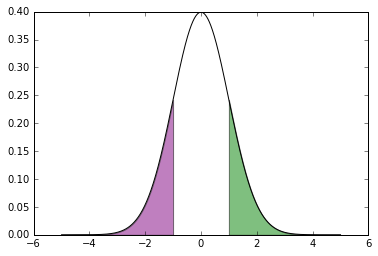

In [43]:
f_result = -np.cos(np.pi) + np.cos(0)
f = lambda x: np.sin(x)

a1 = 0
b1 = np.pi
result1, tol1 = integrate.quad(f, a1, b1)
print(result1/f_result)

g_result = -np.exp(-np.inf) + np.exp(0)
g = lambda x: np.exp(-x)

a2 = 0
b2 = np.inf
result2, tol2 = integrate.quad(g, a2, b2)
print(result2/g_result)

# h_result = 
print(h_result)
h = lambda x: (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)

a3 = 1
b3 = np.inf
result3, tol3 = integrate.quad(h, a3, b3)
x = np.linspace(-5, 5, 10000)

# plt.plot(x, h(x))
fig, ax = plt.subplots()

ax.plot(x, h(x), color='black')

# use the data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
# theta = 0.9
# ax.axhline(theta, color='green', lw=2, alpha=0.5)
# ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, h(x), 0, where=x > 1, facecolor='green', alpha=0.5)
ax.fill_between(x, h(x), 0, where=x < -1, facecolor='purple', alpha=0.5)
# ax.fill_between(x, 0, 1, where=y < -theta, facecolor='red', alpha=0.5, transform=trans)

plt.show()
#matplotlib fill between


## 2. Solve simple ODE's with scipy.integrate.ode

## scipy.integrate.ode(f, jac=None)

## A generic interface class to numeric integrators.

## Solve an equation system $y′(t)=f(t,y)$

In [46]:
'''
Solve y' = y

with 

y(t = 0) = 1
'''
from scipy.integrate import ode


y0, t0 = [1.0, ], 0

def f(t, y):
    return [y[0], ]    
    
t1 = .5    
r = ode(f).set_integrator('zvode', method='bdf')
r.set_initial_value(y0, t0) 
dt = .01
t_arr = np.array([])
y_arr = np.array([])
while r.successful() and r.t < t1:
    t_arr = np.append(t_arr, r.t)
    y = r.integrate(r.t+dt)
    y_arr = np.append(y_arr, y)
    print(r.t, y)

0.01 [ 1.01005118+0.j]
0.02 [ 1.0202025+0.j]
0.03 [ 1.03045591+0.j]
0.04 [ 1.04081233+0.j]
0.05 [ 1.05127277+0.j]
0.06 [ 1.06183829+0.j]
0.07 [ 1.07250996+0.j]
0.08 [ 1.08328886+0.j]
0.09 [ 1.0941761+0.j]
0.1 [ 1.10517279+0.j]
0.11 [ 1.11628009+0.j]
0.12 [ 1.12749907+0.j]
0.13 [ 1.13883082+0.j]
0.14 [ 1.15027642+0.j]
0.15 [ 1.16183698+0.j]
0.16 [ 1.173514+0.j]
0.17 [ 1.18530849+0.j]
0.18 [ 1.19722151+0.j]
0.19 [ 1.20925419+0.j]
0.2 [ 1.22140768+0.j]
0.21 [ 1.23368317+0.j]
0.22 [ 1.24608216+0.j]
0.23 [ 1.2586057+0.j]
0.24 [ 1.27125499+0.j]
0.25 [ 1.28403147+0.j]
0.26 [ 1.29693636+0.j]
0.27 [ 1.3099709+0.j]
0.28 [ 1.32313641+0.j]
0.29 [ 1.33643431+0.j]
0.3 [ 1.34986583+0.j]
0.31 [ 1.36343226+0.j]
0.32 [ 1.3771352+0.j]
0.33 [ 1.39097588+0.j]
0.34 [ 1.40495567+0.j]
0.35 [ 1.41907591+0.j]
0.36 [ 1.43333798+0.j]
0.37 [ 1.44774346+0.j]
0.38 [ 1.46229381+0.j]
0.39 [ 1.47699036+0.j]
0.4 [ 1.49183457+0.j]
0.41 [ 1.50682789+0.j]
0.42 [ 1.52197186+0.j]
0.43 [ 1.53726811+0.j]
0.44 [ 1.55271807+0.j]

## Mini-breakout

## Solve $$y' = ay$$ with $$y(0) = 2$$ analytically.

In [53]:
'''How to handle extra parameters


y' = a*y

y(t = 0) = 2

'''


y0, t0 = [2.0, ], 0

def f(t, y, arg1):
    return [arg1*y[0], ]
    
    
r = ode(f).set_integrator('zvode', method='bdf')
a = 2.
r.set_initial_value(y0, t0).set_f_params(a)    
t1 = .5
dt = 1e-4
t_arr = np.array([])
y_arr = np.array([])
while r.successful() and r.t < t1:
    t_arr = np.append(t_arr, r.t)
    y = r.integrate(r.t+dt)
    y_arr = np.append(y_arr, y)
#     print(r.t, y)

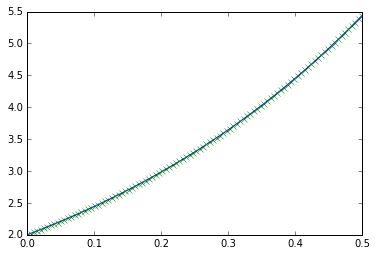

In [54]:
t = np.linspace(0, 0.5, 100)
y = a*np.exp(a*t)
plt.plot(t_arr, y_arr)
plt.plot(t, y, 'x')
plt.show()

In [62]:
'''How to handle extra parameters


y' = a*y

y(t = 0) = 2

'''


y0, t0 = [2.0, ], 0

def f(t, y, b, a):
    return [b*t + a*t*y[0], ]
    
    
r = ode(f).set_integrator('zvode', method='bdf')
a = 123.
b = 100.
r.set_initial_value(y0, t0).set_f_params(b, a)    
t1 = .5
dt = 1e-4
t_arr = np.array([])
y_arr = np.array([])
while r.successful() and r.t < t1:
    t_arr = np.append(t_arr, r.t)
    y = r.integrate(r.t+dt)
    y_arr = np.append(y_arr, y)
#     print(r.t, y)

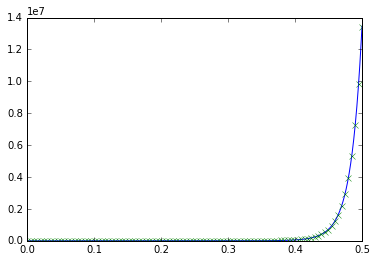

In [63]:
t = np.linspace(0, 0.5, 100)
y = (2+b/a)*np.exp(a*(t**2)/2) - b/a
plt.plot(t_arr, y_arr)
plt.plot(t, y, 'x')
plt.show()

## Mini-breakout 

## Solve the following 1st order ODE by using separation of varibles 
## (modified from Boas p. 398, Problem 10)

## $$ y' - aty = bt$$

## with the initial condition

## $$y(t = 0) = 2$$

## Breakout:

## Solve the above differential equation using scipy.integrate.ode

## Plot your result and compare the analytical result

# End of Week12-1

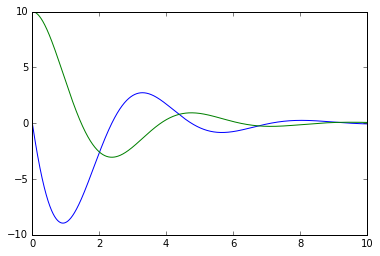

In [6]:
%matplotlib inline

from scipy.integrate import ode

y0, t0 = [10.0, 0], 0

def f(t, y, b, K):
    return [y[1], -b*y[1] - K*y[0]]
    
    
r = ode(f).set_integrator('zvode', method='bdf')
b = 1.
K = 2.
r.set_initial_value(y0, t0).set_f_params(b, K)    
t1 = 10.
dt = 1e-4
t_arr = np.array([])
v_arr = np.array([])
x_arr = np.array([])

while r.successful() and r.t < t1:
    t_arr = np.append(t_arr, r.t)
    x, v = r.integrate(r.t+dt)
    v_arr = np.append(v_arr, v)
    x_arr = np.append(x_arr, x)
#     print(r.t, y)

plt.plot(t_arr, v_arr)
plt.plot(t_arr, x_arr)
plt.show()